<a href="https://colab.research.google.com/github/litlsun/compling/blob/main/task2_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Шаг 1: Установка необходимых библиотек и загрузка текста

# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q
!pip install nltk

# Импортируем необходимые инструменты
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy
import pandas as pd
import numpy as np

# Загружаем Spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Подключаем ресурсы NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [4]:
import requests

# Прямой URL на файл
url = "https://raw.githubusercontent.com/vifirsanova/compling/main/tasks/task1/data.txt"

# Загружаем текст из файла
response = requests.get(url)

# Проверяем успешность загрузки
if response.status_code == 200:
    text = response.text
else:
    text = ""
    print("Ошибка загрузки текста")

# Печатаем первые 500 символов текста для проверки
print(text[:500])

Title: 5 Common SQL Mistakes and How to Avoid Them

Ever wondered how to effectively use 5 common sql mistakes and how to avoid them.

This topic is crucial for developers because it helps in creating efficient and reusable code. We'll cover the basics and also discuss some advanced techniques. By the end of this article, you'll have a clear understanding of how to implement this in your projects.

To deepen your understanding, explore the additional resources we've shared. Don't hesitate to exp


In [9]:
# Шаг 2: Сегментация на предложения, слова и биграммы

# Сегментация на уровне предложений
sentences = nltk.sent_tokenize(text)

# Сегментация на уровне слов
words = nltk.word_tokenize(text)

# Сегментация на уровне биграмм
bigrams = list(ngrams(words, 2))

# Выводим результаты сегментации
print("НА УРОВНЕ ПРЕДЛОЖЕНИЙ:", sentences[:10])
print("НА УРОВНЕ СЛОВ:", words[:10])
print("НА УРОВНЕ БИГРАММ:", bigrams[:10])

НА УРОВНЕ ПРЕДЛОЖЕНИЙ: ['Title: 5 Common SQL Mistakes and How to Avoid Them\n\nEver wondered how to effectively use 5 common sql mistakes and how to avoid them.', 'This topic is crucial for developers because it helps in creating efficient and reusable code.', "We'll cover the basics and also discuss some advanced techniques.", "By the end of this article, you'll have a clear understanding of how to implement this in your projects.", "To deepen your understanding, explore the additional resources we've shared.", "Don't hesitate to experiment and learn.", "Title: Understanding Python Generators\n\nIf you're new to coding, this guide will help you understand understanding python generators.", 'Through this blog, we aim to provide a clear explanation of the concepts, complete with code snippets and real-world applications.', "If you've been avoiding this topic, now's the time to tackle it!", 'We hope this guide has provided you with a solid foundation.']
НА УРОВНЕ СЛОВ: ['Title', ':', '5'

In [ ]:
import pandas as pd
from itertools import zip_longest

merged = list(zip_longest(sentences, words, bigrams))
df = pd.DataFrame(merged, columns=["sentences", "words", "bigrams"])
df[:10]

,sentences,words,bigrams
0,Title: 5 Common SQL Mistakes and How to Avoid ...,Title,"(Title, :)"
1,This topic is crucial for developers because i...,:,"(:, 5)"
2,We'll cover the basics and also discuss some a...,5,"(5, Common)"
3,"By the end of this article, you'll have a clea...",Common,"(Common, SQL)"
4,"To deepen your understanding, explore the addi...",SQL,"(SQL, Mistakes)"
5,Don't hesitate to experiment and learn.,Mistakes,"(Mistakes, and)"
6,Title: Understanding Python Generators\n\nIf y...,and,"(and, How)"
7,"Through this blog, we aim to provide a clear e...",How,"(How, to)"
8,"If you've been avoiding this topic, now's the ...",to,"(to, Avoid)"
9,We hope this guide has provided you with a sol...,Avoid,"(Avoid, Them)"


Доля уникальных слов: 0.0032
Топ 10 биграмм:
('Title', ':'): 1000
('If', 'you'): 687
(',', 'we'): 681
('in', 'your'): 615
('!', 'Title'): 601
('.', 'We'): 576
('.', 'If'): 547
('how', 'to'): 502
('we', "'ll"): 490
('We', "'ll"): 416

Топ 10 триграмм:
('!', 'Title', ':'): 601
('.', 'If', 'you'): 547
(',', 'we', "'ll"): 490
('.', 'We', "'ll"): 416
('in', 'your', 'projects'): 412
('at', 'first', ','): 409
('the', 'additional', 'resources'): 406
('additional', 'resources', 'we'): 406
('resources', 'we', "'ve"): 406
('.', 'Do', "n't"): 406


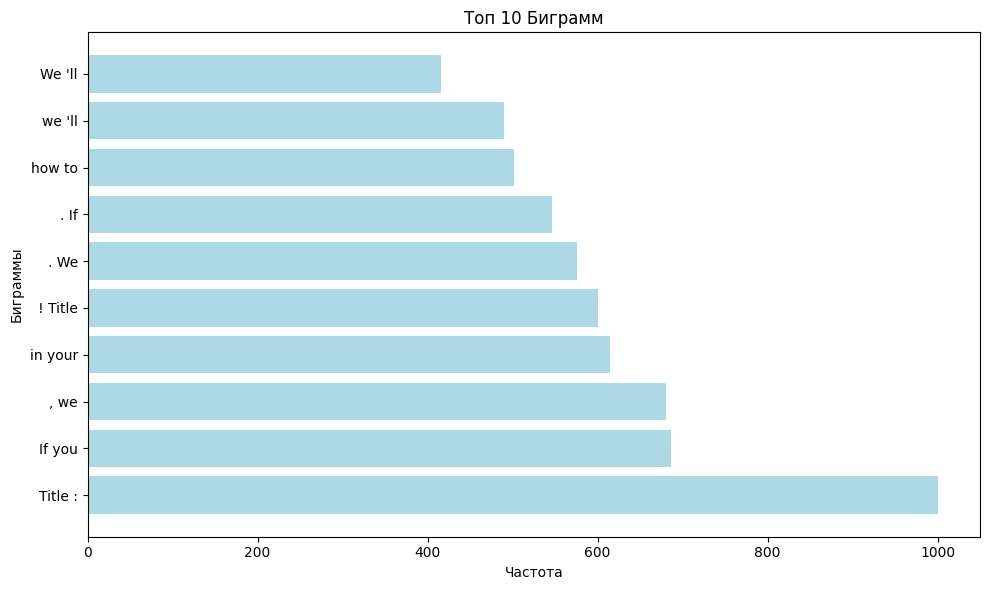

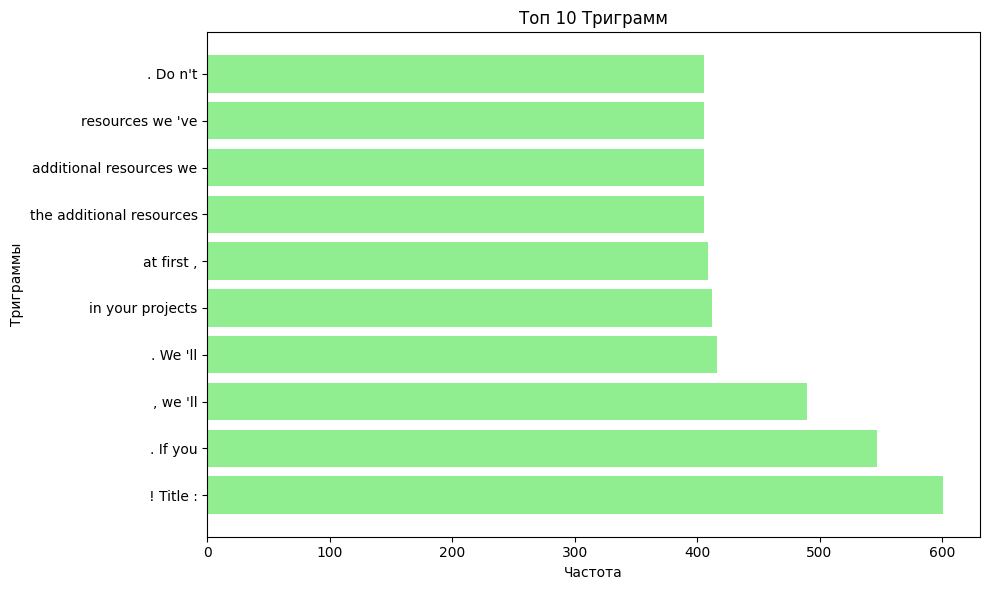

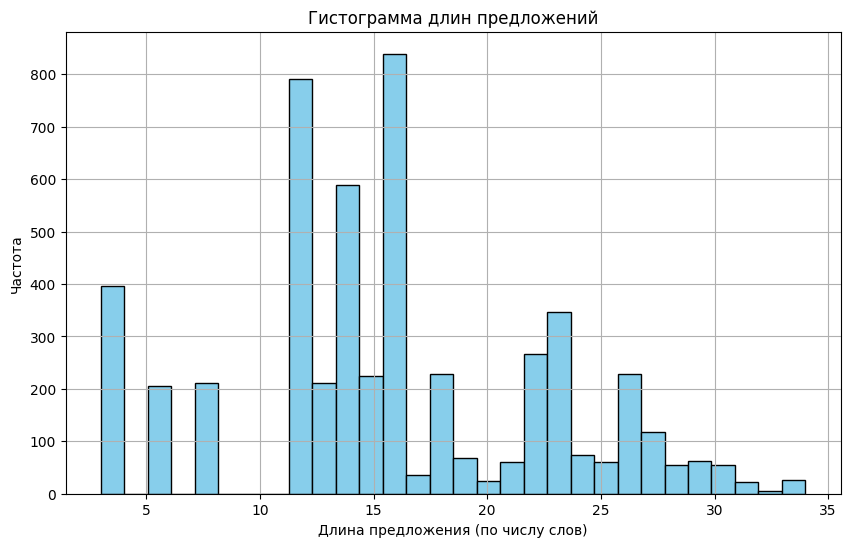

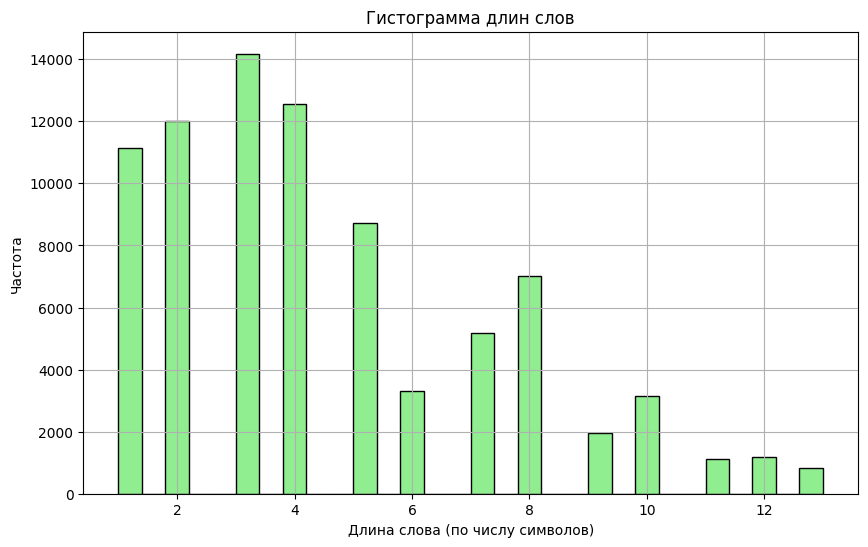

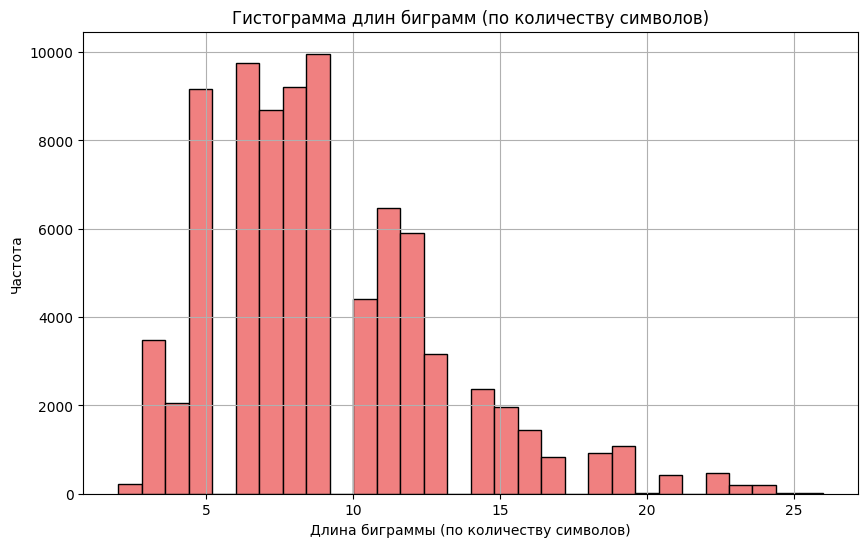

Средняя длина предложения: 15.82
Стандартное отклонение длины предложений: 6.70
Медиана длины предложений: 15.00
Квартиль 25%, 50%, 75% длины предложений: [12. 15. 22.]


In [10]:
# Шаг 3: Статистический анализ

# 1. Анализ уникальности данных
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
print(f"Доля уникальных слов: {lexical_diversity:.4f}")

# 2. Частотный анализ биграмм и триграмм
# Генерация биграмм и триграмм
bigrams = list(ngrams(words, 2))  # биграммы (пары слов)
trigrams = list(ngrams(words, 3))  # триграммы (тройки слов)

# Частотное распределение биграмм
bigram_counts = Counter(bigrams)

# Частотное распределение триграмм
trigram_counts = Counter(trigrams)

# Выводим 10 наиболее частых биграмм
print("Топ 10 биграмм:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")

# Выводим 10 наиболее частых триграмм
print("\nТоп 10 триграмм:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")

# Визуализация частоты биграмм (гистограмма)
bigram_labels, bigram_values = zip(*bigram_counts.most_common(10))  # Исправили: разделяем метки и значения

# Преобразуем биграммы в строки для удобства отображения
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]

plt.figure(figsize=(10, 6))
plt.barh(bigram_labels, bigram_values, color='lightblue')
plt.title("Топ 10 Биграмм")
plt.xlabel("Частота")
plt.ylabel("Биграммы")
plt.tight_layout()
plt.show()

# Визуализация частоты триграмм (гистограмма)
trigram_labels, trigram_values = zip(*trigram_counts.most_common(10))  # Исправили: разделяем метки и значения

# Преобразуем триграммы в строки для удобства отображения
trigram_labels = [' '.join(trigram) for trigram in trigram_labels]

plt.figure(figsize=(10, 6))
plt.barh(trigram_labels, trigram_values, color='lightgreen')
plt.title("Топ 10 Триграмм")
plt.xlabel("Частота")
plt.ylabel("Триграммы")
plt.tight_layout()
plt.show()

# 3. Анализ распределений: Длины предложений, слов и n-грамм
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
word_lengths = [len(word) for word in words]
bigram_lengths = [len(bigram) for bigram in bigrams]
# 3.1. Гистограмма для длин предложений
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Гистограмма длин предложений")
plt.xlabel("Длина предложения (по числу слов)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# 3.2. Гистограмма для длин слов
word_lengths = [len(word) for word in words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=30, color='lightgreen', edgecolor='black')
plt.title("Гистограмма длин слов")
plt.xlabel("Длина слова (по числу символов)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# 3.3. Гистограмма для длин n-грамм (например, биграмм)

# Считаем длину биграммы по количеству символов (сумма символов в обоих словах)
bigram_lengths = [len(bigram[0]) + len(bigram[1]) for bigram in bigrams]

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(bigram_lengths, bins=30, color='lightcoral', edgecolor='black')
plt.title("Гистограмма длин биграмм (по количеству символов)")
plt.xlabel("Длина биграммы (по количеству символов)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# Вычисляем медиану, стандартное отклонение и квартили
mean_sentence_length = np.mean(sentence_lengths)
std_sentence_length = np.std(sentence_lengths)
median_sentence_length = np.median(sentence_lengths)
quartiles_sentence_length = np.percentile(sentence_lengths, [25, 50, 75])

print(f"Средняя длина предложения: {mean_sentence_length:.2f}")
print(f"Стандартное отклонение длины предложений: {std_sentence_length:.2f}")
print(f"Медиана длины предложений: {median_sentence_length:.2f}")
print(f"Квартиль 25%, 50%, 75% длины предложений: {quartiles_sentence_length}")

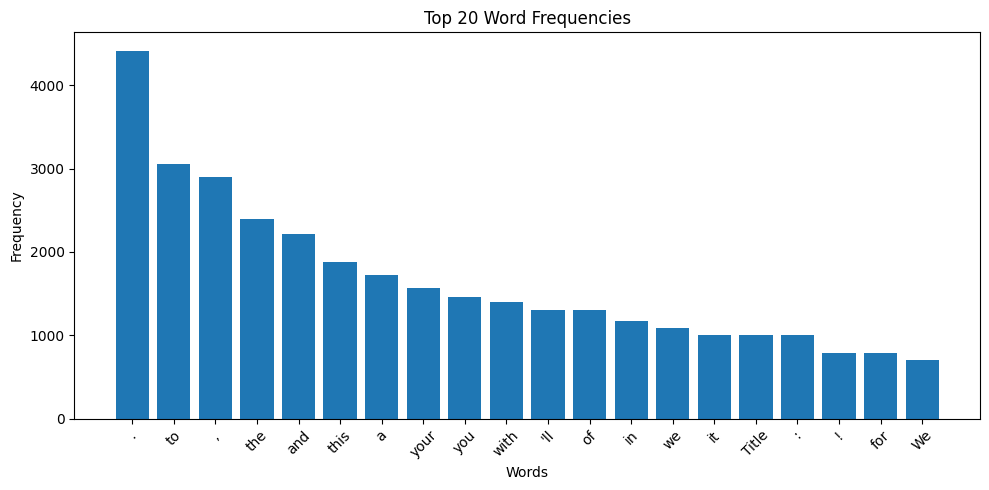

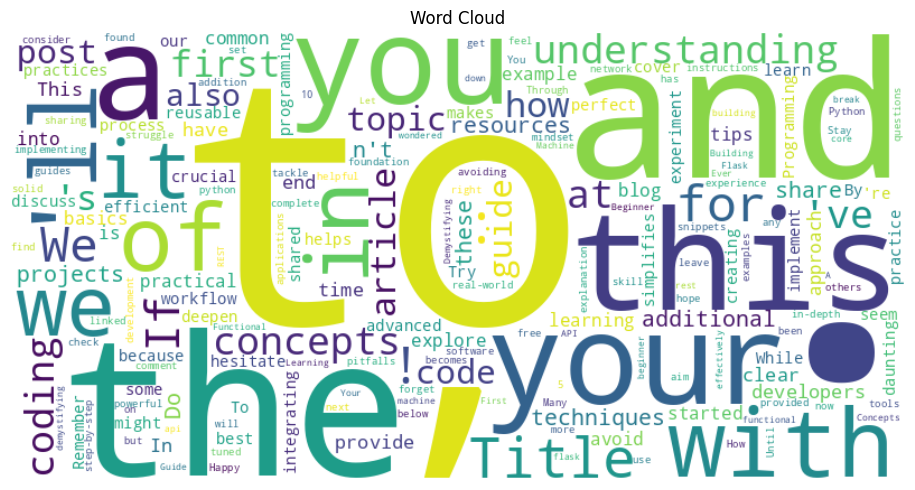

In [ ]:
# Шаг 4: Визуализация

# 1. Построение гистограммы для частотного распределения слов
word_counts = Counter(words)

plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


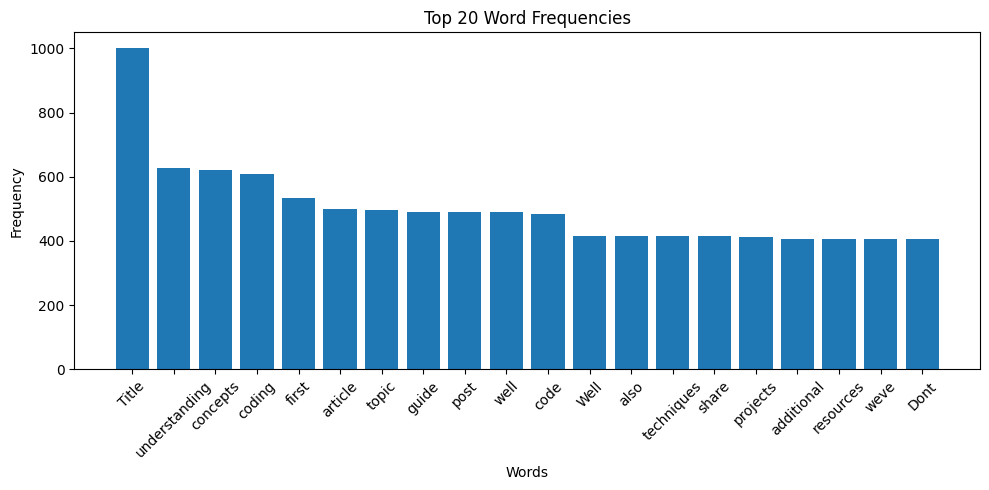

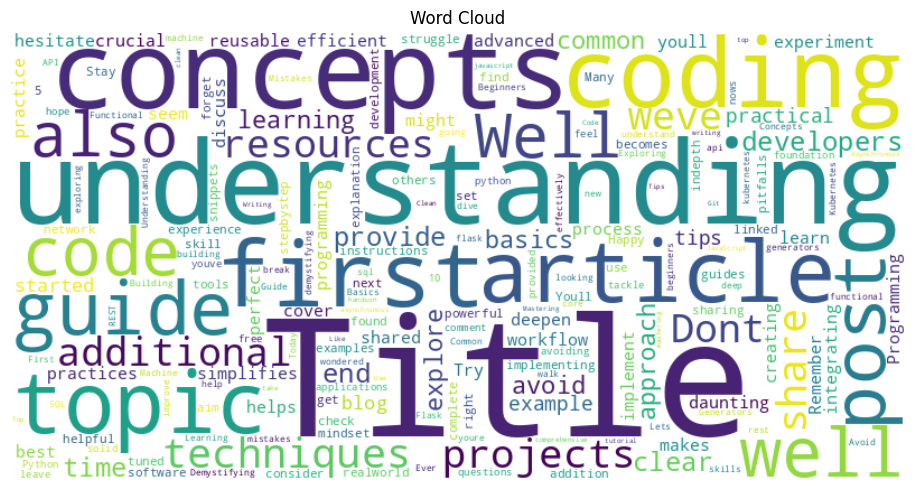

In [7]:
# Построим также облако слов и частотный список, исключив стоп-слова

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Скачать список стоп-слов

# Получаем список стоп-слов
stop_words = set(stopwords.words('english'))

# Убираем все знаки препинания с помощью регулярного выражения
text_without_punctuation = re.sub(r'[^\w\s]', '', text)

# Разделяем текст на слова
words = text_without_punctuation.split()

# Оставляем только те слова, которые не являются стоп-словами
filtered_words = [word for word in words if word.lower() not in stop_words]

# Собираем текст обратно без стоп-слов
filtered_text = " ".join(filtered_words)

# Сегментация на уровне предложений
sentences = nltk.sent_tokenize(filtered_text)

# Сегментация на уровне слов
words = nltk.word_tokenize(filtered_text)

# Сегментация на уровне биграмм
bigrams = list(ngrams(words, 2))


# Построение гистограммы для частотного распределения слов (без учета стоп-слов)
word_counts = Counter(words)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Построение облака слов (без учета стоп-слов)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.show()

In [ ]:
!pip install datasets -q -U # загружаем библиотеку для работы с HF Datasets

In [ ]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df)

# Публикация датасета
dataset.push_to_hub("name", token="token")

# просмотр результатов
dataset

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/83 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Dataset({
    features: ['sentences', 'words', 'bigrams'],
    num_rows: 82338
})